# 🪐 Introduction

In this notebook, you will learn how to analyze over three thousand speculative fiction novels using HathiTrust Research Center (HTRC) Analytics. Rather than working with the complete text of these novels, we will use "Extracted Features": a data format devised by HathiTrust in order to enable text analysis on [post-1926 books still under copyright protection](https://en.wikipedia.org/wiki/Public_domain_in_the_United_States).

Beginning with a print book that looks like this...

<img src="img/wells_moon_print.jpg" alt="first page of Wells The First Men in the Moon" style="width: 400px;"/>

...then scanning and OCRing it to grab its text...

```
THE FIRST MEN IN 
 THE MOON 
 
 MR. BEDFORD MEETS MR. CAVOR AT LYMPNE 
 
 As I sit down to write here amidst the 
 shadows of vine-leaves under the blue sky of 
 southern Italy, it comes to me with a certain 
 quality of astonishment that my participation 
 in these amazing adventures of Mr. Cavor 
 was, after all, the outcome of the purest acci- 
 dent. It might have been any one. I fell 
 into these things at a time when I thought 
 myself removed from the slightest possibility 
 of disturbing experiences. I had gone to 
 Lympne because I had imagined it the most 
 uneventful place in the world. " Here, at any 
 rate," said I, " I shall find peace and a chance 
 to work ! " 
 ' And this book is the sequel. So utterly at 
```

...HTRC finally transforms that text into Extracted Features: a compressed `.json` file no longer readable by human eyes ("consumptive" reading), yet containing "quantitative abstractions of a book’s written content" that we can explore through text analysis ("non-consumptive" reading):

```json
":1,"l":1,"r":1,"o":1},"tokenPosCount":{"rate":{"NN":1},"accident":{"NN":1},"IN":{"IN":1},"astonishment":{"NN":1},"down":{"RB":1},"slightest":{"JJS":1},"quality":{"NN":1},"find":{"VB":1},"disturbing":{"JJ":1},"AT":{"IN":1},"vine-leaves":{"NNS":1},"any":{"DT":2},"southern":{"JJ":1},"myself":{"PRP":1},"have":{"VB":1},"is":{"VBZ":1},"MOON":{"NN":1},"said":{"VBD":1},"Lympne":{"NNP":1},"sit":{"VBP":1},"thought":{"VBD":1},".":{".":5},"adventures":{"NNS":1},"blue":{"JJ":1},"THE":{"DT":2},"world":{"NN":1},"fell":{"VBD":1},"CAVOR":{"NNP":1},"all":{"DT":1},"book":{"NN":1},"had":{"VBD":2},"imagined":{"VBN":1},"it":{"PRP":2},"!":{".":1},"A":{"DT":1},"a":{"DT":3},"And":{"CC":1},"utterly":{"RB":1},"sky":{"NN":1},"shadows":{"NNS":1},"outcome":{"NN":1},"Here":{"RB":1},"because":{"IN":1},"Mr.":{"NNP":1},"purest":{"JJS":1},"removed":{"VBD":1},"certain":{"JJ":1},"comes":{"VBZ":1},"MEN":{"NNP":1},"I":{"PRP":7},"LYMPNE":{"NNP":1},"work":{"VB":1},"that":{"WDT":1},"possibility":{"NN":1},"to":{"TO":4},"participation":{"NN":1},"MEETS":{"VBZ":1},",":{",":6},"most":{"RBS":1},"here":{"RB":1},"these":{"DT":2},"was":{"VBD":1},"at":{"IN":3},"been":{"VBN":1},"FIRST":{"NNP":1},"'":{"''":1},"my":{"PRP$":1}
```

Each element you see in the `.json` sample above is a *feature,* a "quantifiable marker of something measurable, a datum," as Peter Organisciak and Boris Capitanu put it in their [*Programming Historian* tutorial](https://programminghistorian.org/en/lessons/text-mining-with-extracted-features) on text mining with HTRC. They continue:

> A computer cannot understand the meaning of a sentence implicitly, but it can understand the counts of various words and word forms, or the presence or absence of stylistic markers, from which it can be trained to better understand text. Many text features are non-consumptive in that they don’t retain enough information to reconstruct the book text.

As we'll see, Extracted Features files will allow us not only to count "tokens" (words) in each "volume" (published book), but also to filter by parts of speech, browse extensive bibliographic metadata, view quantitative information about each printed page in the dataset, use named entity recognition (NER) to identify people, places, or organizations in the text, graph these elements, and more.

# 🪐 Overview of HTRC data

HTRC provides a number of [specialized, recommended worksets](https://analytics.hathitrust.org/staticrecommendedworksets): genre- or period-specific collections of books (or "volumes") that have been digitized by HathiTrust. Here, we'll work with David Mimno and Laure Thompson's **20th Century English-Language Speculative Fiction** workset. It contains 3,236 "volumes of speculative fiction [from 1900-1999] identified both through matching titles and authors to [Worlds Without End](https://www.worldswithoutend.com/), an extensive fan-built database of speculative fiction, and via computational text similarity analysis techniques."

As we explore this workset of speculative fiction, it is important to remember the ways that databases and bibliographies of SF are inherently exclusionary. Suzanne Boswell, who uses The Internet Speculative Fiction Database (ISFDB) in a network analysis of women writers in pulp magazines of the 1920s-40s ([article](https://www.liverpooluniversitypress.co.uk/journals/article/61993/) | [data](https://github.com/sfboswell/Gender_Pulps)), argues that standard bibliographies of SF are almost never representative.

> The ISFDB chooses what constitutes science fiction, horror, and fantasy by deciding what to archive in its database. For the early twentieth century, this mainly means the pulps. This decision makes it difficult to track the contributions of women to the science fiction genre: if the pulps excluded women, and bibliographic archives only count the pulps as science fiction, where do we find the women? Another example: in the early twentieth century, most science fiction by Black authors was published outside of the pulps (W. E. B. Dubois's “The Comet” [1920]; Pauline Hopkins's *Of One Blood* [1902–1903]; George Schuyler's short stories in *The Pittsburgh Courier* [1936–1937]). The ISFDB will have the bibliographic information for, say, George Schuyler—but it does not have bibliographic information for other Black-dominated magazines, or Black fiction pamphlets, where other Black speculative fiction writers may exist outside of sf archives. Marginalized authors who write outside the pulps enter science fiction archives as exceptions: their community does not come with them. In this way, science fiction archives repeat the exclusionary patterns of the early twentieth century.

Building text corpora using databases like WWE and ISFDB can severely limit the diverse range of voices that contributed to 20th-century speculative fiction.

# 🪐 Downloading HTRC data

The [HTRC Analytics interface](https://analytics.hathitrust.org) provides a few different, pre-defined ways of accessing, analyzing, and downloading the data in their recommended worksets. I have already pre-downloaded all of the files needed for this tutorial and included them in this GitHub repository. So, if it's speculative fiction you want to work with, feel free to move on to the tutorial's [next 🪐 section](#Working-with-metadata-for-entire-SF-workset) to explore that data. Otherwise, if you would like to use one of HTRC's recommended worksets, create one of your own, or learn the steps I took to get these files, continue reading below the line.

***********

In order to download our volumes, we'll use Feature Reader, a Python library for working with the HTRC Extracted Features dataset.

For future reference: another way of downloading and analyzing Extracted Features is by generating an `rsync` file on HathiTrust's website. You can browse a number of recommended, genre- or period-specific worksets by navigating to <https://analytics.hathitrust.org/worksets> and logging in or create an account. Here are the full [instructions for doing so](https://analytics.hathitrust.org/algorithms/Extracted_Features_Download_Helper?wsname=20th+Century+English-Language+Speculative+Fiction%40htrc). That process generates a shell script, `EF_Rsync.sh`. Once downloaded and run, that script will download the Extracted Features files for all volumes in that workset, storing them in a tricky pairtree file/folder format. Using that process, you can also download pre-processed analyses of the texts in the workset, including named entity recognition, token counts, and topic modeling.

But in this tutorial, we'll do the downloading right in this notebook using Python. Again, *I've already done so and downloaded all of the Extracted Features data into the [`data/SF_Extracted_Features`](https://github.com/gwijthoff/HTRC_SF_experiments/tree/main/data/SF_Extracted_Features) directory of this repo.*

Thompson and Mimno's original list actually included 5,168 identified volumes of SF in HathiTrust, but there many duplicate copies (i.e. the [1998 Anchor Books edition](https://catalog.hathitrust.org/Record/004963699) and the [2006 Everyman edition](https://catalog.hathitrust.org/Record/009819360) of Margaret Atwood's *The Handmaid's Tale.* So, let's begin by reading a .tsv file of all those volumes using [Pandas](https://pandas.pydata.org/), a Python library for working with tabular data. Then let's remove the duplicates.

In [56]:
# create dataframe from Thomson and Mimno's full list of 5,168 SF volumes
import pandas as pd
df = pd.read_csv('data/thompson-mimno-SF-final-matches.tsv', delimiter='	')
df

,HTID,WWE Novel ID,Title,Author,Hand / Auto?
0,mdp.39015011054155,1,The Demolished Man,Alfred Bester,Both
1,mdp.39015012120492,1,The Demolished Man,Alfred Bester,Both
2,mdp.39015023453395,1,The Demolished Man,Alfred Bester,Both
3,uc1.32106002161526,1,The Demolished Man,Alfred Bester,Both
4,uc1.32106014483108,4,The Big Time,Fritz Leiber,Both
...,...,...,...,...,...
5163,mdp.39015058073100,32192,Firebirds,Sharyn November,Hand
5164,uc1.32106018772332,34603,The Best Japanese Science Fiction Stories,John L. Apostolou & Martin H. Greenberg,Hand
5165,uva.x001520569,34603,The Best Japanese Science Fiction Stories,John L. Apostolou & Martin H. Greenberg,Hand
5166,pst.000017894845,34957,Invasions,Isaac Asimov & Martin H. Greenberg & Charles G...,Hand


In [57]:
# remove duplicate titles, leaving us with 3,236 unique works
df_minus_duplicates = df.drop_duplicates(subset=['Title'])
df_minus_duplicates

,HTID,WWE Novel ID,Title,Author,Hand / Auto?
0,mdp.39015011054155,1,The Demolished Man,Alfred Bester,Both
4,uc1.32106014483108,4,The Big Time,Fritz Leiber,Both
5,mdp.39015013534014,5,A Case of Conscience,James Blish,Both
8,mdp.39015038922574,6,Starship Troopers,Robert A. Heinlein,Both
11,mdp.39015000611528,7,A Canticle for Leibowitz,"Walter M. Miller, Jr.",Auto
...,...,...,...,...,...
5162,pst.000018452310,32157,The Guardians,John Christopher,Auto
5163,mdp.39015058073100,32192,Firebirds,Sharyn November,Hand
5164,uc1.32106018772332,34603,The Best Japanese Science Fiction Stories,John L. Apostolou & Martin H. Greenberg,Hand
5166,pst.000017894845,34957,Invasions,Isaac Asimov & Martin H. Greenberg & Charles G...,Hand


GitHub limits us to storing 1,000 files per folder, so let's take a random sample of 1,000 of these volumes to download and work with. *If you are running this notebook and downloading locally, you can skip this stem and download all 3,236 volumes!*

In [60]:
# create a new dataframe with 1,000 volumes randomly sampled from our list
# random_state=1 keeps the same 1,000 works, rather than re-sampling
df_sample = df_minus_duplicates.sample(n=1000, random_state=1)
df_sample

,HTID,WWE Novel ID,Title,Author,Hand / Auto?
3529,hvd.32044022705982,11533,Marching Sands,Harold Lamb,Auto
2579,mdp.39015010748435,7638,On a Pale Horse,Piers Anthony,Both
4634,uc1.32106018461399,21693,The Children's Hospital,Chris Adrian,Both
3841,mdp.39015011726406,13215,Operation Time Search,Andre Norton,Both
3939,mdp.39015058014633,13758,Atlas Shrugged,Ayn Rand,Auto
...,...,...,...,...,...
4387,mdp.39015010359415,18239,Sturgeon Is Alive and Well…,Theodore Sturgeon,Both
1050,mdp.39015002969064,2044,Solaris,Stanislaw Lem,Hand
1824,mdp.39015000515224,4158,Motorman,David Ohle,Auto
2373,mdp.39015011802256,7166,The Shores of Death,Michael Moorcock,Both


In [61]:
# create a list of the HathiTrust IDs column
sf_ids = df_sample['HTID'].tolist()
sf_ids[:10] # view the first 10 results

['hvd.32044022705982',
 'mdp.39015010748435',
 'uc1.32106018461399',
 'mdp.39015011726406',
 'mdp.39015058014633',
 'uc1.32106010775655',
 'mdp.39015056811675',
 'mdp.39015028909813',
 'mdp.39015008551809',
 'mdp.39015000529969']

Next we need to install HTRC's Feature Reader, the Python library that will allow us to download and explore the Extracted Features data.

In [ ]:
# install the HTRC Feature Reader
! pip install htrc-feature-reader

We can now download the Extracted Features files. Altogether, these 1,000 volumes will be 164.5 MB and will take a few minutes to download. If you're downloading all 3,236 volumes, it will be 534 MB. (For details on the download process and some other methods for doing so, see [HTRC's documentation on downloading Extracted Features](https://github.com/htrc/htrc-feature-reader/blob/master/examples/ID_to_Rsync_Link.ipynb).)

In [ ]:
# download Extracted Features files to a subdirectory in our data folder

from htrc_features import utils
utils.download_file(htids=sf_ids, outdir='data/SF_Extracted_Features')

**********************

# 🪐 Pulling data on one volume

In [152]:
# Recall the first dataframe we created...
df_sample.sample(5)

,HTID,WWE Novel ID,Title,Author,Hand / Auto?
4046,mdp.39015054152858,15843,One Door Away from Heaven,Dean Koontz,Both
2425,mdp.39015009385694,7397,A Perfect Vacuum,Stanislaw Lem,Hand
1466,mdp.39015038916485,3209,The Great Divorce,C. S. Lewis,Both
257,mdp.39015049645875,317,Glory Road,Robert A. Heinlein,Both
4339,mdp.39015008662218,18114,Best SF: 1971,Brian W. Aldiss & Harry Harrison,Hand


In [189]:
# let's reset the index to number each row
SFlist = df_sample.reset_index().drop(columns='index')

In [190]:
SFlist

,HTID,WWE Novel ID,Title,Author,Hand / Auto?
0,hvd.32044022705982,11533,Marching Sands,Harold Lamb,Auto
1,mdp.39015010748435,7638,On a Pale Horse,Piers Anthony,Both
2,uc1.32106018461399,21693,The Children's Hospital,Chris Adrian,Both
3,mdp.39015011726406,13215,Operation Time Search,Andre Norton,Both
4,mdp.39015058014633,13758,Atlas Shrugged,Ayn Rand,Auto
...,...,...,...,...,...
995,mdp.39015010359415,18239,Sturgeon Is Alive and Well…,Theodore Sturgeon,Both
996,mdp.39015002969064,2044,Solaris,Stanislaw Lem,Hand
997,mdp.39015000515224,4158,Motorman,David Ohle,Auto
998,mdp.39015011802256,7166,The Shores of Death,Michael Moorcock,Both


We could use a HathiTrust ID to pull Extracted Features information online. For example, taking the dataframe index 996 (the number in the leftmost column) for Stanisław Lem's *Solaris,* using the ID in the first column `mdp.39015002969064`.

In [74]:
from htrc_features import Volume
vol = Volume("mdp.39015002969064")
vol

However, we want to work with the local files we just downloaded. So, we need to create a new column in our dataframe that points to the path for the Extracted Features file of each volume. Each file uses a HathiTrust ID, needs to be prefaced by its directory location `data/SF_Extracted_Features/`, and suffixed with its filetype `.json.bz2`.

In [191]:
# create a new column combining directory location and filetype strings
# with existing HTID column
SFlist['Initial Path'] = 'data/SF_Extracted_Features/' + SFlist['HTID'] + '.json.bz2'
SFlist.sample(5)

,HTID,WWE Novel ID,Title,Author,Hand / Auto?,Initial Path
604,mdp.39015056814380,13214,Dark Piper,Andre Norton,Both,data/SF_Extracted_Features/mdp.39015056814380....
113,pst.000010465424,7523,"The Great Science Fiction Stories Volume 10, 1948",Isaac Asimov & Martin H. Greenberg,Hand,data/SF_Extracted_Features/pst.000010465424.js...
820,mdp.39015009018329,7164,Lord of the Spiders,Michael Moorcock,Both,data/SF_Extracted_Features/mdp.39015009018329....
457,mdp.39015032577341,2807,The Judas Rose,Suzette Haden Elgin,Both,data/SF_Extracted_Features/mdp.39015032577341....
393,mdp.39015073958574,14466,Hero,Perry Moore,Auto,data/SF_Extracted_Features/mdp.39015073958574....


One thing to note is that some HathiTrust IDs contain `:` and `/` characters, which imply local directory locations. When downloading Extracted Features files, Feature Reader replaces those characters with `+` and `=`, respectively. For those volumes, we need to replace those characters to reflect the actual location. For example, Ursula K. Leguin's *A Wizard of Earthsea,* will be changed in the `Initial Path` column from

`dul1.ark:/13960/t51g5w741.json.bz2`

to 

`dul1.ark+=13960=t51g5w741.json.bz2`.

In [192]:
# to see which files contain those characters
# SFlist[SFlist['HTID'].str.contains('/')]

# create a new Path column for our final location
SFlist['Path'] = SFlist['HTID'].str.replace(':','+').str.replace('/','=')

# add directory slugs and file type
SFlist['Path'] = 'data/SF_Extracted_Features/' + SFlist['Path'] + '.json.bz2'

# remove Initial Path column with incorrect location
SFlist = SFlist.drop(columns=['Initial Path'])

# verify that the Le Guin volume path is now correct
SFlist[SFlist['Title'].str.contains('Earthsea')]

,HTID,WWE Novel ID,Title,Author,Hand / Auto?,Path
953,dul1.ark:/13960/t51g5w741,1438,A Wizard of Earthsea,Ursula K. Le Guin,Both,data/SF_Extracted_Features/dul1.ark+=13960=t51...


Now, we can select the file path for one row in our dataframe, and pull the Extracted Features for that volume. We'll use `iloc` to select a cell at row 996 and column 5 (counting over from the left beginning at 0). Once we have that local file path, we can access the Extracted Features data for that volume using Feature Reader.

In [169]:
# select line 996 for Solaris and column 5 for the file path
lem_path = SFlist.iloc[996,5]
# pull the Extracted Features
vol = Volume(lem_path)
vol

And we can interact with the Extracted Features in many ways. For example, we can pull various metadata fields and insert them into a string of text:

In [101]:
print(f'There are {vol.page_count}pp. in {vol.title}, which was published in {vol.pub_place} and can be identified by OCLC number {vol.oclc}.')
print(f'This copy of {vol.title} was originally digitized at {vol.source_institution}.')

There are 236pp. in Solaris., which was published in New York (State) and can be identified by OCLC number 105763.
This copy of Solaris. was originally digitized at MIU.


To view a list of all available metadata fields for this volume (others will have more or less metadata available), run this:

In [102]:
vol.parser.meta.keys()

dict_keys(['id', 'metadata_schema_version', 'enumeration_chronology', 'type_of_resource', 'title', 'date_created', 'pub_date', 'language', 'access_profile', 'isbn', 'issn', 'lccn', 'oclc', 'page_count', 'feature_schema_version', 'access_rights', 'alternate_title', 'category', 'genre_ld', 'genre', 'contributor_ld', 'contributor', 'handle_url', 'source_institution_ld', 'source_institution', 'lcc', 'type', 'is_part_of', 'last_rights_update_date', 'pub_place_ld', 'pub_place', 'main_entity_of_page', 'publisher_ld', 'publisher'])

To view the values for any of those fields, simply enter `vol.FIELD`. For example:

In [105]:
# date of the latest copyright update for this book
vol.last_rights_update_date

20130810

In [106]:
# count the number of tokens per page
tokenspp = vol.tokens_per_page()
tokenspp.head()

page
2       2
3      23
9      23
10    122
11    100
Name: tokenCount, dtype: int64

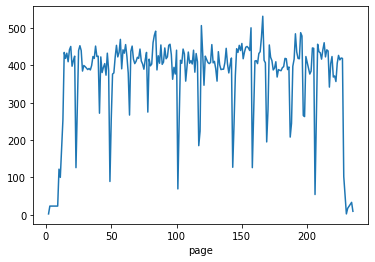

In [107]:
# graph the count of tokens per page over the course of the book
tokenspp.plot()

Return details on each token's part of speech (represented by the [Penn Tree Bank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) for English), number of times it appears in the book, and the section it appears in the book.

In [108]:
tl = vol.tokenlist()
tl.sample(10)

,,,,count
page,section,token,pos,
210,body,divine,JJ,2
216,body,laws,NNS,1
124,body,Earth,NNP,1
147,body,one,CD,1
113,body,it,PRP,5
112,body,agreed,VBD,1
220,body,an,DT,1
210,body,mind,NN,2
42,body,arms,NNS,1


In [109]:
# create a list of all the unique tokens / words in the book
words = vol.tokens()
# count those words / measure size of the book's vocabulary
print(len(words))

9720


In [110]:
# view other section features, counting number of tokens, 
# lines, and sentences on each page of the book
features = vol.section_features()
features[100:110]

,tokenCount,lineCount,emptyLineCount,capAlphaSeq,sentenceCount
page,,,,,
108,398,40,0,3,23.0
109,436,40,0,5,45.0
110,406,40,0,3,23.0
111,413,40,0,4,34.0
112,404,40,0,3,30.0
113,441,40,0,3,40.0
114,382,41,0,3,26.0
115,432,41,0,3,26.0
116,410,40,0,4,18.0


# 🪐 Enriching our bibliography

Next, we can pull some of that Extracted Features data for each volume back into `SFlist`, the dataframe of all the volumes we're working with. We'll create a new dataframe for all of this bibliographic data, calling it `SFbib`.

In [193]:
# clean up the df, dropping columns we won't use
SFbib = SFlist.drop(columns=['WWE Novel ID', 'Hand / Auto?'])
SFbib.sample(5)

,HTID,Title,Author,Path
229,mdp.39015066783047,Science Fiction: The Very Best of 2005,Jonathan Strahan,data/SF_Extracted_Features/mdp.39015066783047....
91,mdp.39015049971347,From the Corner of His Eye,Dean Koontz,data/SF_Extracted_Features/mdp.39015049971347....
141,uc1.b3865802,Galaxies Like Grains of Sand,Brian W. Aldiss,data/SF_Extracted_Features/uc1.b3865802.json.bz2
344,uva.x030204013,InterWorld,Neil Gaiman & Michael Reaves,data/SF_Extracted_Features/uva.x030204013.json...
795,uc1.$b56471,The Incomplete Enchanter,L. Sprague de Camp & Fletcher Pratt,data/SF_Extracted_Features/uc1.$b56471.json.bz2


In [194]:
# for some reason it looks like
# mdp.39015058731913 is not in the EF dataset
# and returns non-zero exit status 23 when trying to dl
# so let's remove it. index #868 in the current DF
SFbib = SFbib.drop(868)

Let's loop through each line of our dataframe, pulling the published year of each volume.

In [201]:
# it appears this doesn't work. Every volume comes up 1979!!

test = SFbib

for item in test['Path']:
    vol = Volume(item)
    test['Pub Year'] = vol.year

test.sample(10)

,HTID,Title,Author,Path,Pub Year
382,uva.x004306159,The Last Continent,Terry Pratchett,data/SF_Extracted_Features/uva.x004306159.json...,1979
706,mdp.39015054283174,The Approaching Storm,Alan Dean Foster,data/SF_Extracted_Features/mdp.39015054283174....,1979
659,mdp.39015027249575,Native Tongue,Suzette Haden Elgin,data/SF_Extracted_Features/mdp.39015027249575....,1979
774,mdp.39015014165461,A Treasury of Science Fiction,Groff Conklin,data/SF_Extracted_Features/mdp.39015014165461....,1979
569,mdp.39015005906592,Something Wicked This Way Comes,Ray Bradbury,data/SF_Extracted_Features/mdp.39015005906592....,1979
46,mdp.39015082695852,The Love We Share Without Knowing,Christopher Barzak,data/SF_Extracted_Features/mdp.39015082695852....,1979
435,mdp.39015002143181,The Reign of Wizardry,Jack Williamson,data/SF_Extracted_Features/mdp.39015002143181....,1979
358,osu.32435018243055,To the Moon and Back in Ninety Days,John Young Brown,data/SF_Extracted_Features/osu.32435018243055....,1979
807,mdp.39015033438634,Hell! Said the Duchess: A Bedtime Story,Michael Arlen,data/SF_Extracted_Features/mdp.39015033438634....,1979
648,mdp.39015004811058,James and the Giant Peach,Roald Dahl,data/SF_Extracted_Features/mdp.39015004811058....,1979


NEXTNEXTNEXTNEXT

In [ ]:
# graph the distribution of publication years for volumes in the list

# 🪐 Filtering our new bibliographic dataframe

We can now use this DataFrame containing bibliographic and file path info to query Extracted Features data on each book.

Let's filter the author column to all volumes containing the string "Delany," to find works included in this list written by Samuel R. Delany.

In [202]:
SFbib[SFbib['Author'].str.contains('Delany')]

,HTID,Title,Author,Path,Pub Year
17,mdp.39015014574118,Return to Nevèrÿon,Samuel R. Delany,data/SF_Extracted_Features/mdp.39015014574118....,1979
246,mdp.39015009287676,Triton,Samuel R. Delany,data/SF_Extracted_Features/mdp.39015009287676....,1979
303,mdp.39015046879170,Flight from Nevèrÿon,Samuel R. Delany,data/SF_Extracted_Features/mdp.39015046879170....,1979
376,mdp.39015005320745,Babel-17,Samuel R. Delany,data/SF_Extracted_Features/mdp.39015005320745....,1979
531,mdp.39015008420773,The Fall of the Towers,Samuel R. Delany,data/SF_Extracted_Features/mdp.39015008420773....,1979
918,mdp.39015025318307,Nebula Winners Thirteen,Samuel R. Delany,data/SF_Extracted_Features/mdp.39015025318307....,1979
952,mdp.39015056666087,"Aye, and Gomorrah: And Other Stories",Samuel R. Delany,data/SF_Extracted_Features/mdp.39015056666087....,1979


# 🪐 What's next

Check out these tutorials for more examples of how to work with Extracted Features data and HTRC's Feature Reader.

- [README.ipynb](https://github.com/htrc/htrc-feature-reader/blob/master/README.ipynb) from the HTRC github documentation
- [Text Mining in Python through the HTRC Feature Reader](https://programminghistorian.org/en/lessons/text-mining-with-extracted-features) from the *Programming Historian*
- [Analyzing Documents with TF-IDF](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf) at the *Programming Historian* also uses HTRC Extracted Features
- visualize the rise and fall of topic models across a book with [htrc-book-models](https://github.com/organisciak/htrc-book-models)